What I should teach?
1. Traditional vs Modern CV (/)
2. Modern use NN, so how NN work? (/)
3. Nowadays use Conv, how Conv work? it is just matmul (/)
4. How to improve? according to jeremy got 5 ways (/)
5. Improve architecture based on previous paper (/) do at demo
6. Interpret CNN model 
6. Kaggle
7. Deploy to Production -> fastapi or onnxruntime
7. create dataset
-  Gotcha with Ml ['data leakage(proper train/valid,image sizes,camera brand)']
8. What other thing can be done for CV? ['classify','segment','detect','generate','face-verify','domain-adapt']

In [1]:
from IPython.display import HTML
html1 = '''
  <script>
  $('img').css({display:'block',"margin-left":"auto","margin-right":"auto"})
  </script>
  '''
HTML(html1)

# Computer Vision with Pytorch

# $whoami

 1. Khursani
 2. Fullstack Software Engineer
 3. Participate in various type of competition
    * Security (crypto & web & forensic & R.E & etc)
    * Programming (Puzzle & Bin Packing & CV)
    * Testing (Test Design & Test Script)
    * Network (Cisco & server)

# Outline

1. Computer Vision Introduction
2. Traditional vs Modern CV (Manual vs Automatic)
3. Linear Regression
4. Convolution
5. Resnet
6. SeNET
7. Metric Learning
8. fastai2
9. Exercise
10. Q & A

# What is Computer Vision

1. Subset of AI
2. Automate what human can do
3. Feasable to solve with deep learning

# Traditional CV

[Kernels](//setosa.io/ev/image-kernels/)
[Haar Cascade](//www.youtube.com/watch?v=hPCTwxF0qf4)

# Modern CV

1. Automatically find best kernels(feature extractor)

2. End2End Learning

3. Generalizable(Work great even though not in train set)

4. Robust with changes(Flexible with noisy data)

5. Easy to develop(As long understand ML)

![test](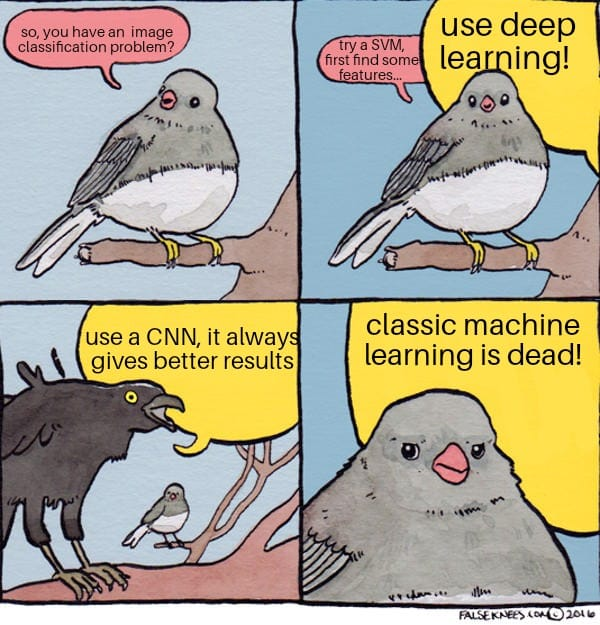 "test2")

# Linear Regression (Optional)

1. Foundation of Deep learning

![alt text](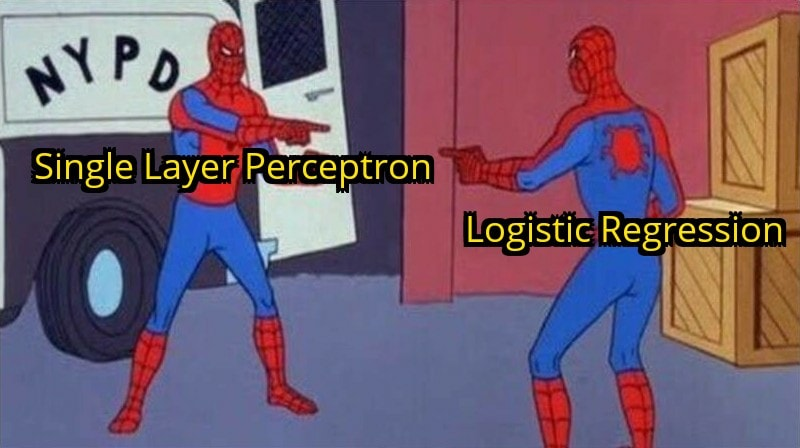
 "test")

In [2]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

(100,)

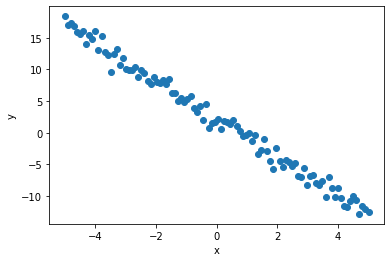

In [8]:
#synthetic dataset
x = np.linspace(-5,5,100)
display(x.shape)
w_true = -3   # can specify our ground truth
b_true = 2  # can specify our ground truth

def noise(n):
    return npr.normal(size=(n))

y = x*w_true+b_true + noise(100)

plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x,y);

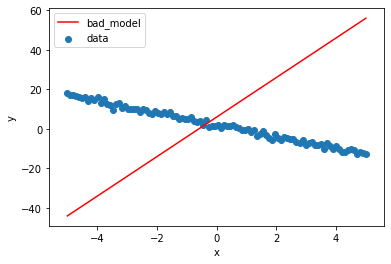

In [16]:
# Our BAD linear regression model
w = 10
b = 6
y_hat = x*w+b
plt.plot(x,y_hat,color='red',label='bad_model')
plt.scatter(x,y,label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# How to measure how bad our model is??

In [17]:
def mse(y_true, y_pred):
    error = y_true - y_pred
    sq_err = np.power(error,2)
    return np.mean(sq_err)

mse(y,y_hat)

1453.358205182833

In [18]:
from ipywidgets import interact, FloatSlider
@interact(
    w=FloatSlider(min=-10,max=10,step=0.1),
    b=FloatSlider(min=-10,max=30,step=0.1)
)
def optimize_plot(w,b):
    y_est = x * w + b
    plt.scatter(x,y,alpha=0.3,label='data')
    plt.plot(x,y_est,color='red',label='model')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title(f'MSE: {mse(y,y_est):.02f}')

interactive(children=(FloatSlider(value=0.0, description='w', max=10.0, min=-10.0), FloatSlider(value=0.0, des…

# How to automate tuning the knob??

\begin{equation}
f(w) = w^2 + 3 * w -5
\end{equation}

In [19]:
# derivative function
def df(w):
    return 2*w+3 

In [20]:
# initialize w
w = 10.

In [21]:
# gradient descent algorithm
def gd(w):
    w = w - df(w) * 0.01
    return w

# Linear regression with pytorch

In [29]:
import torch
from torch import tensor,nn

In [30]:
n=100

In [31]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.4591,  1.0000],
        [ 0.0617,  1.0000],
        [-0.7215,  1.0000],
        [-0.9091,  1.0000],
        [ 0.2315,  1.0000]])

In [33]:
a = tensor([3.,2]); a

tensor([3., 2.])

In [34]:
y = x@a + torch.rand(n)

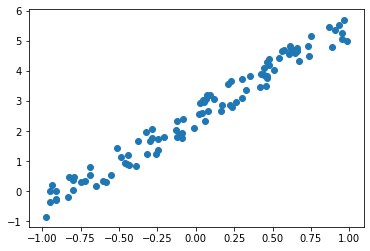

In [35]:
plt.scatter(x[:,0], y);

In [36]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [37]:
wb = tensor([-1.,1])

In [38]:
y_hat = x@wb
mse(y_hat, y)

tensor(7.8593)

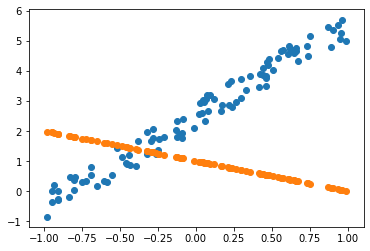

In [39]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

In [40]:
wb = nn.Parameter(wb); wb

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [41]:
def update():
    y_hat = x@wb
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        wb.sub_(lr * wb.grad)
        wb.grad.zero_()

In [42]:
lr = 1e-1
for t in range(100): update()

tensor(7.8593, grad_fn=<MeanBackward0>)
tensor(1.5018, grad_fn=<MeanBackward0>)
tensor(0.4733, grad_fn=<MeanBackward0>)
tensor(0.1963, grad_fn=<MeanBackward0>)
tensor(0.1196, grad_fn=<MeanBackward0>)
tensor(0.0983, grad_fn=<MeanBackward0>)
tensor(0.0924, grad_fn=<MeanBackward0>)
tensor(0.0908, grad_fn=<MeanBackward0>)
tensor(0.0903, grad_fn=<MeanBackward0>)
tensor(0.0902, grad_fn=<MeanBackward0>)


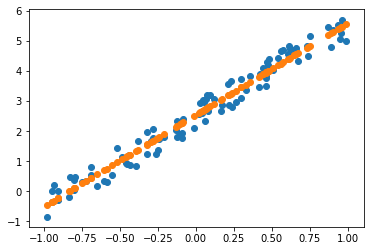

In [43]:
plt.scatter(x[:,0],y)
y_hat = x@wb
plt.scatter(x[:,0],y_hat.detach().numpy());

In [44]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [45]:
wb = nn.Parameter(tensor([-1.,1]))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
y_hat = x@wb

line, = plt.plot(x[:,0].detach().numpy(),y_hat.detach().numpy())
plt.close()

def animate(i):
    update()
    y_hat = x@wb
    line.set_ydata(y_hat.detach().numpy())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

# BREAK

![test](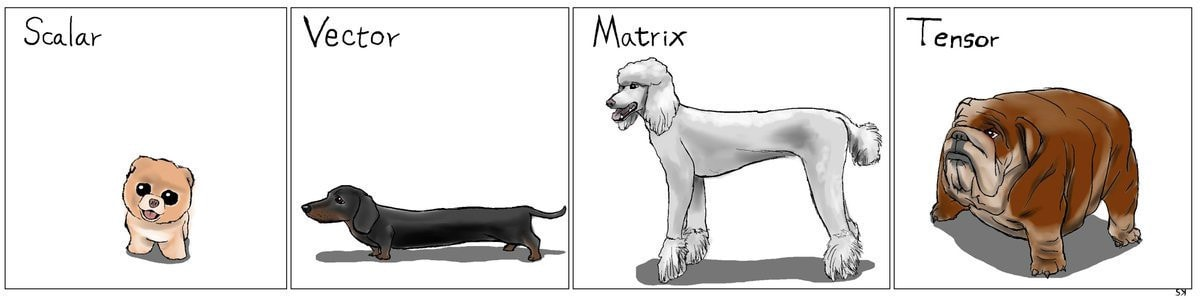
 "test")

## DEMO

# What is the most important thing need for building deep learning model?

1. Data

2. Architecture/Model

3. Loss Function

4. Optimizer

# Building Linear model with \*insert dataset name here\*

Approaches to reducing overfitting:
1. Adding more data
2. use data augmentation
3. arch that generalize well
4. add regularization
5. reduce arch complexity

# Conclusion

1. Neural network can solve anything that is can be compute
2. Only use Neural network for something that is hard to program like how to classify cat or dog
3. 

# appendix

1. https://medium.com/@CharlesOllion/whats-easy-hard-in-ai-computer-vision-these-days-e7679b9f7db7
2. https://medium.com/@pjgrizel/how-to-screw-up-a-computer-vision-project-166dfcc44a5f
3. https://machinelearning.wtf/

# References
1. https://course.fast.ai/
2. https://pytorch.org/tutorials/